In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Data Preprocessing:

import cv2 as cv
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score

# Models:

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# A model that I learned by myself: CatBoost + Plotly

# from catboost import CatBoostClassifier
# import plotly.graph_objects as go
# import plotly.io as pio
# import plotly.express as px

# offline (for plotly)

#import plotly.offline as pyo

# Clustering:

from sklearn.cluster import KMeans

# PCA:

from sklearn.decomposition import PCA

# ICA:

from sklearn.decomposition import FastICA

# Scaling:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Cross Validation:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [23]:
def procces_image(img_path):
    img = cv.imread(img_path  )
    img = cv.resize(img , (32,32))

    img = img.reshape(32*32*3)
    img = np.append(img, img.ravel().mean())
    return img

In [24]:
def load_data(path):
    x = []
    y = []

    for file in os.listdir(path):
        label = file.split('.')[0]
        data = procces_image("{}/{}".format(path,file))
        x.append(data)
        y.append(label)
    return x,y

In [25]:
features, targets = load_data('C:\\Users\Selfisher\Desktop\school\DeiScei\Project\catsvdogs')

In [26]:
features = np.asarray(features)
targets = np.asarray(targets)

In [27]:
features.shape

(25000, 3073)

In [28]:
df = pd.DataFrame(features)
df['label'] = targets

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3064,3065,3066,3067,3068,3069,3070,3071,3072,label
0,93.0,171.0,210.0,103.0,181.0,224.0,114.0,192.0,235.0,119.0,...,4.0,4.0,1.0,3.0,3.0,1.0,3.0,3.0,119.620768,cat
1,41.0,37.0,33.0,40.0,42.0,38.0,43.0,43.0,35.0,47.0,...,45.0,62.0,45.0,48.0,66.0,31.0,36.0,51.0,72.590495,cat
2,61.0,55.0,46.0,65.0,58.0,49.0,66.0,59.0,50.0,64.0,...,160.0,162.0,34.0,157.0,169.0,4.0,193.0,194.0,108.319661,cat
3,217.0,222.0,221.0,229.0,229.0,229.0,228.0,228.0,228.0,224.0,...,202.0,202.0,215.0,215.0,214.0,207.0,212.0,215.0,164.578451,cat
4,64.0,100.0,126.0,53.0,92.0,118.0,63.0,104.0,129.0,108.0,...,72.0,86.0,77.0,101.0,116.0,55.0,82.0,94.0,103.436198,cat


In [30]:
features = df.drop(['label'], axis=1)
targets = df['label']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, targets ,random_state = 42)
x_train_train, x_val, y_train_train, y_val = train_test_split(x_train, y_train ,random_state = 7)

In [41]:
y_train.value_counts() # Raughly the same amount of cats and dogs

cat    9391
dog    9359
Name: label, dtype: int64

# Dimension reduction

In [43]:
pca = PCA()
pca.fit(x_train)

PCA()

In [87]:
expl = pd.DataFrame(pca.explained_variance_ratio_*100, columns= ['var_explained'])
expl.head()

,var_explained
0,18.998383
1,10.521264
2,7.209609
3,5.701735
4,3.010888


In [93]:
expl = expl.head(250)

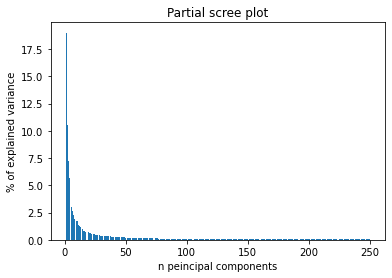

In [95]:
plt.bar(x = range(1, len(expl)+1), height = expl.var_explained)
plt.ylabel('% of explained variance')
plt.xlabel('n peincipal components')
plt.title('Partial scree plot')
plt.show()

In [102]:
sum(expl.iloc[:50].var_explained)

75.0607724802838

In [107]:
total_explained = []
ind =[]
for i in range(1, 500):
    ind.append(i)
    total_explained.append(sum(expl.iloc[:i].var_explained))

In [108]:
total_explained 

[18.998382600654057,
 29.519646220349802,
 36.729255231705835,
 42.4309906785236,
 45.4418790176423,
 48.080184547267734,
 50.329684311636996,
 52.239617383811364,
 54.004129235380425,
 55.73501023299512,
 57.12685068043405,
 58.370323781779604,
 59.53836193746612,
 60.54707561179698,
 61.39169017461147,
 62.18009241688814,
 62.93871907682636,
 63.64058786551128,
 64.33052507046938,
 64.96089773671177,
 65.54588384798045,
 66.05509784968608,
 66.56062149182463,
 67.0535327685472,
 67.51931935322257,
 67.9608736124311,
 68.39834221549083,
 68.79854827134795,
 69.18311373220088,
 69.56297164267218,
 69.9318476750203,
 70.28110828985042,
 70.61403479718066,
 70.94208369436622,
 71.26641655357669,
 71.58566402493605,
 71.90241207313439,
 72.1947010539267,
 72.47289226578258,
 72.74359157848737,
 73.0073754022888,
 73.26326997329322,
 73.51068104286729,
 73.74694496717885,
 73.97841030230127,
 74.201803338091,
 74.42429713384041,
 74.64308541029914,
 74.85755685835895,
 75.0607724802838,
 7